1. Implemente os algoritmos da iteração de ponto fixo, Newton-Raphson e secante usando somente a biblioteca Numpy.

In [1]:
import numpy as np

# função de teste f(x)
def f(x):
    return x**3 - x**2 + 2

def ponto_fixo(x0, tol, max_iter):
    x = np.zeros(max_iter)
    x[0] = x0
    for i in range(1, max_iter):
        x[i] = f(x[i-1])
        if abs(x[i] - x[i-1]) < tol:
            return x[i], i
    return None, max_iter

def newton_raphson(x0, tol, max_iter):
    x = np.zeros(max_iter)
    x[0] = x0
    for i in range(1, max_iter):
        x[i] = x[i-1] - f(x[i-1]) / (3*x[i-1]**2 - 2*x[i-1])
        if abs(x[i] - x[i-1]) < tol:
            return x[i], i
    return None, max_iter

def secante(x0, x1, tol, max_iter):
    x = np.zeros(max_iter)
    x[0] = x0
    x[1] = x1
    for i in range(2, max_iter):
        x[i] = x[i-1] - f(x[i-1])*(x[i-1]-x[i-2])/(f(x[i-1])-f(x[i-2]))
        if abs(x[i] - x[i-1]) < tol:
            return x[i], i
    return None, max_iter

#teste  ponto fixo
x0 = 1.5
tol = 1e-6
max_iter = 50
raiz, n_iter = ponto_fixo(x0, tol, max_iter)
if raiz is not None:
    print(f"A raiz é: {raiz} encontrada em {n_iter} iterações")
else:
    print("O método não convergiu")

#teste newton raphson
x0 = 1
tol = 1e-6
max_iter = 50
raiz, n_iter = newton_raphson(x0, tol, max_iter)
if raiz is not None:
    print(f"A raiz é: {raiz} encontrada em {n_iter} iterações")
else:
    print("O método não convergiu")

#teste secante
x0 = 0
x1 = 2
tol = 1e-6
max_iter = 50
raiz, n_iter = secante(x0, x1, tol, max_iter)
if raiz is not None:
    print(f"A raiz é: {raiz} encontrada em {n_iter} iterações")
else:
    print("O método não convergiu")


O método não convergiu
A raiz é: -1.0 encontrada em 2 iterações
A raiz é: -1.0 encontrada em 3 iterações


C:\Users\Admin\AppData\Local\Temp\ipykernel_1928\3446630547.py:5: RuntimeWarning: overflow encountered in scalar power
  return x**3 - x**2 + 2
C:\Users\Admin\AppData\Local\Temp\ipykernel_1928\3446630547.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  return x**3 - x**2 + 2


2. Use a iteração de ponto fixo simples para localizar a raiz de f (x) = 2 sin(p x)− x, tendo x0 = 0, 5 e adotando como critério de parada o erro ea ≤ 0, 001%.

In [2]:
#função f(x)
def f(x, p):
    return 2*np.sin(p*x) - x

#função g(x)
def g(x, p):
    return 2*np.sin(p*x)

def ponto_fixo(x0, p, tol):
    x_ant = x0
    x_atual = g(x_ant, p)
    n_iter = 0
    while abs((x_atual - x_ant) / x_atual) > tol:
        x_ant = x_atual
        x_atual = g(x_ant, p)
        n_iter += 1
    return x_atual, n_iter

x0 = 0.5
p = np.pi
tol = 0.001

raiz, n_iter = ponto_fixo(x0, p, tol)

print(f"A raiz é: {raiz:.5f} encontrada em {n_iter} iterações")

A raiz é: -0.85837 encontrada em 1875 iterações


3. Determine a maior raiz real de f (x) = 2x 3 − 11.7x 2 + 17.7x − 5
(a) Graficamente;
(b) Pelo método da iteração de ponto fixo (três iterações, x0 = 3)( certifique-se de desenvolver
uma solução que convirja para a raiz);
(c) Pelo método de Newton-Raphson (três iterações, x0 = 3);
(d) Pelo método da secante (três iterações, x−1 = 3, x0 = 4).

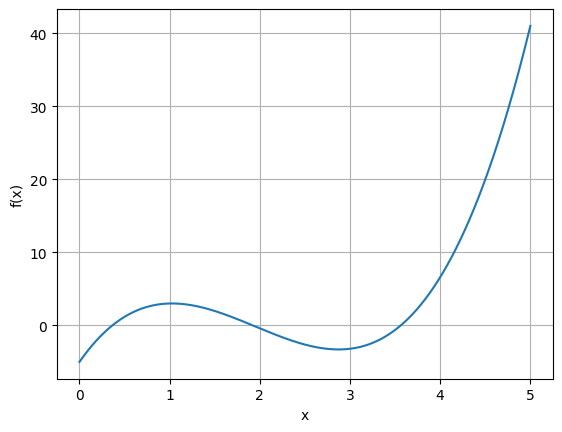

In [3]:
# a)
import matplotlib.pyplot as plt

# função f(x)
def f(x):
    return 2*x**3 - 11.7*x**2 + 17.7*x - 5

x = np.linspace(0, 5, 1000)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

In [4]:
#B)
def g(x):
    return (11.7*x**2 - 17.7*x + 5) / (2*x**2)

def ponto_fixo(x0, n_iter):
    x = x0
    for i in range(n_iter):
        x = g(x)
    return x

x0 = 3
n_iter = 3


raiz = ponto_fixo(x0, n_iter)

print(f"A maior raiz real encontrada pelo método da iteração de ponto fixo é: {raiz:.5f}")


A maior raiz real encontrada pelo método da iteração de ponto fixo é: 3.40621


In [5]:
#C)
# derivada da função f(x)
def df(x):
    return 6*x**2 - 23.4*x + 17.7

def newton_raphson(x0, n_iter):
    x = x0
    for i in range(n_iter):
        x = x - f(x) / df(x)
    return x

x0 = 3
n_iter = 3

raiz = newton_raphson(x0, n_iter)

print(f"A maior raiz real encontrada pelo método de Newton-Raphson é: {raiz:.5f}")


A maior raiz real encontrada pelo método de Newton-Raphson é: 3.79293


In [6]:
#D)
# Implementação do método da secante
def secante(x0, x1, n_iter):
    for i in range(n_iter):
        x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        x0 = x1
        x1 = x2
    return x2

# Definindo os parâmetros
x0 = 3
x1 = 4
n_iter = 3

# Resolvendo
raiz = secante(x0, x1, n_iter)

print(f"A maior raiz real encontrada pelo método de Newton-Raphson é: {raiz:.5f}")

A maior raiz real encontrada pelo método de Newton-Raphson é: 3.58628


4. Compare os métodos da bisseção, falsa posição, do ponto fixo, de Newton-Raphson e da secante, localizando a raiz das seguintes equações:
(a) f1 (x) = 2x 4 + 4x 3 + 3x 2 − 10x − 15, com x ∗ ∈ [0, 3]
(b) f2 (x) = (x + 3)(x + 1)(x − 2) 3 , com x ∗ ∈ [0, 5]
(c) f3 (x) = 5x 3 + x 2 − e 1−2x + cos(x) + 20, com x ∗ ∈ [−5, 5]
(d) f4 (x) = sin(x)x + 4, com x ∗ ∈ [1, 5]
(e) f5 (x) = (x − 3) 5 ln(x), com x ∗ ∈ [2, 5]
(f) f6 (x) = x 10 − 1, com x ∗ ∈ [0.8, 1.2]
Para as avaliações, deve-se considerar:
• o número máximo de iterações de todos os métodos testados não pode ultrapassar 200;
• a tolerância deve ser de 10−10;
• para os métodos abertos, escolha os limites do intervalo, respectivamente como x?1 e x0
.
Para cada método, estamos interessados em comparar:
• raiz;
• número de iterações até o critério de parada;
• se houve erro de convergência;
• tempo de cálculo (procure como calcular tempo de execução usando jupyter notebooks,
como %timeit).

In [7]:

def medir_tempo(func):
    def wrapper(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fim = time.time()
        print(f"Tempo de execução de {func.__name__}: {fim - inicio:.8f} segundos")
        return resultado
    return wrapper

def bissecao(f, a, b, tol=1e-10, max_iter=200):
    n_iter = 0
    if f(a)*f(b) > 0:
        print("Não há raiz no intervalo")
        return None, None
    while n_iter < max_iter:
        c = (a + b)/2
        if abs(f(c)) < tol:
            return c, n_iter
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
        n_iter += 1
    print("Não convergiu")
    return None, max_iter

def falsa_posicao(f, a, b, tol=1e-10, max_iter=200):
    n_iter = 0
    if f(a)*f(b) > 0:
        print("Não há raiz no intervalo")
        return None, None
    while n_iter < max_iter:
        c = (a*f(b) - b*f(a))/(f(b) - f(a))
        if abs(f(c)) < tol:
            return c, n_iter
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
        n_iter += 1
    print("Não convergiu")
    return None, max_iter


def ponto_fixo(f, g, x0, tol=1e-10, max_iter=200):
    n_iter = 0
    x_ant = x0
    while n_iter < max_iter:
        x_atual = g(x_ant)
        if abs((x_atual - x_ant)/x_atual) < tol:
            return x_atual, n_iter
        x_ant = x_atual
        n_iter += 1
    print("Não convergiu")
    return None, max_iter

def newton_raphson(f, df, x0, tol=1e-10, max_iter=200):
    n_iter = 0
    while n_iter < max_iter:
        fx = f(x0)
        dfx = df(x0)
        x_atual = x0 - fx/dfx
        if abs(x_atual - x0) < tol:
            return x_atual, n_iter
        x0 = x_atual
        n_iter += 1
    print("Não convergiu")
    return None, max_iter

def secante(f, x0, x1, tol, max_iter):
    n_iter = 0
    while n_iter < max_iter:
        f_x0 = f(x0)
        f_x1 = f(x1)
        x2 = x1 - (f_x1*(x1-x0))/(f_x1-f_x0)
        if abs(f(x2)) < tol:
            return x2, n_iter
        x0, x1 = x1, x2
        n_iter += 1
    print("Não convergiu")
    return None, max_iter


# Definindo a função
f4 = lambda x: np.sin(x)*x + 4

# Usando o método da bisseção
raiz_bissecao_f4, n_iter_bissecao_f4 = bissecao(f4, 1, 5, 1e-10, 200)

# Usando o método da falsa posição
raiz_falsa_posicao_f4, n_iter_falsa_posicao_f4 = falsa_posicao(f4, 1, 5, 1e-10, 200)

# Usando o método do ponto fixo
g_f4 = lambda x: -4/np.sin(x)
raiz_ponto_fixo_f4, n_iter_ponto_fixo_f4 = ponto_fixo(f4, g_f4, 1.5, 1e-10, 200)

# Usando o método de Newton-Raphson
df4 = lambda x: np.cos(x)*x + np.sin(x)
raiz_newton_f4, n_iter_newton_f4 = newton_raphson(f4, df4, 1.5, 1e-10, 200)

# Usando o método da secante
raiz_secante_f4, n_iter_secante_f4 = secante(f4, 1, 5, 1e-10, 200)

print("Método da bisseção:")
print("Raiz encontrada:", raiz_bissecao_f4)
print("Número de iterações:", n_iter_bissecao_f4)

print("Método da falsa posição:")
print("Raiz encontrada:", raiz_falsa_posicao_f4)
print("Número de iterações:", n_iter_falsa_posicao_f4)

print("Método do ponto fixo:")
print("Raiz encontrada:", raiz_ponto_fixo_f4)
print("Número de iterações:", n_iter_ponto_fixo_f4)

print(n_iter_newton_f4, raiz_newton_f4)

print("Método da secante:")
print("Raiz encontrada:", raiz_secante_f4)
print("Número de iterações:", n_iter_secante_f4)


Tempo de execução de bissecao: 0.00000000 segundos
Tempo de execução de falsa_posicao: 0.00000000 segundos
O método do ponto fixo não convergiu
Tempo de execução de ponto_fixo: 0.00099993 segundos
Tempo de execução de newton_raphson: 0.00000000 segundos
Tempo de execução de secante: 0.00000000 segundos
Método da bisseção:
Raiz encontrada: 4.323239543708041
Número de iterações: 33

Método da falsa posição:
Raiz encontrada: 4.323239543733132
Número de iterações: 8

Método do ponto fixo:
Raiz encontrada: None
Número de iterações: 200

Método de Newton-Raphson:
Raiz encontrada: -4.323239543713715
Número de iterações: 5

Método da secante:
Raiz encontrada: 4.3232395437137425
Número de iterações: 6

